
# Problem - 1

1. Import Python packages that may be useful for examining a given dataset, and set plot style as `searborn-darkgrid`.
2. Import `tips.csv` dataset and print the size and the first five observations of the dataset
3. Determine which of the provided attributes are categorical and which are quantitative. (Hint: use `dtypes`)
4. Use the parameter **total_bill** to compute the following summary statistics:
    - Mean
    - Median
    - Standard Deviation
    - Range
    - The Interquartile Range
        
5. Determine the number of outliers in the observation using the parameter from Question 4.

# Problem - 2 

You are given two datasets:

- **employees.csv** - This dataset contains information about employees in a company. The columns are:
    - EmployeeID
    - Name
    - Department
    - Salary
<br>
- **sales.csv** - This dataset contains information about sales transactions. The columns are:
    - TransactionID
    - EmployeeID
    - ProductID
    - Quantity
    - TransactionDate<br>
<br>
1. Import the datasets `employees.csv` and `sales.csv` into Pandas DataFrames.

2. Merge the two DataFrames using an appropriate type of join to include all sales transactions and their corresponding employee information.

3. Clean the merged dataset by:

  - Removing duplicates
  - Filling or dropping any missing values


4. Create a new column called `RevenueGenerated` which is a product of a hypothetical `ProductPrice` column and the `Quantity` column. Assume that the ProductPrice for ProductID 1 is `$20`, for ProductID 2 is `$15`, and for ProductID 3 is `$30`.

5. Group the data to answer the following questions:

  - What is the total revenue generated by each department?
  - Who are the top 5 employees in terms of revenue generated?
  - What is the monthly revenue trend in the company?

6. Export the cleaned and transformed dataset to a new CSV file called `employee_sales_summary.csv`. 


## Problem 1

#### 1. Import Python packages that may be useful for examining a given dataset, and set plot style as searborn-darkgrid.

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

#### 2. Import tips.csv dataset and print the size and the first five observations of the dataset.

In [201]:
file_path = "tips.csv"

df = pd.read_csv(file_path)


num_rows, num_columns = df.shape
print("Dataset size: {num_rows} rows, {num_columns} columns")

print("First five observations:")
print(df.head())


Dataset size: {num_rows} rows, {num_columns} columns
First five observations:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### 3.Determine which of the provided attributes are categorical and which are quantitative. (Hint: use dtypes)

In [202]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

#### Quantitative or Categorical

total_bill        float64             Continous Quantitative Variable

tip                 float64           Continous Quantitative Variable

sex                 object            Nominal Categorical Variable

smoker              object            Nominal Categorical Variable

day                 object            Nominal Categorical Variable
  
time                object            Nominal Categorical Variable

size                int64             Discrete Quantitative Variable

#### 4. Use the parameter total_bill to compute the following summary statistics:
<br> 1. Mean
<br> 2. Median
<br> 3. Standard Deviation
<br> 4. Range
<br> 5. The Interquartile Range

In [203]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


#### 1. Mean

In [204]:
mean = df["total_bill"].mean()

mean

19.78594262295082

#### 2. Median

In [205]:
median = df["total_bill"].median()

median

17.795

#### 3. Standard deviation

In [206]:
Std = df["total_bill"].std()

Std

8.902411954856856

#### 4. Range

In [207]:
Range = df["total_bill"].max() - df["total_bill"].min() 

Range

47.74

#### 5. Interquartile Range

In [208]:
Q1 = df['total_bill'].quantile(0.25)         # Calculate the IQR (Interquartile Range)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

IQR

10.779999999999998

#### 5. Determine the number of outliers in the observation using the parameter from Question 4.

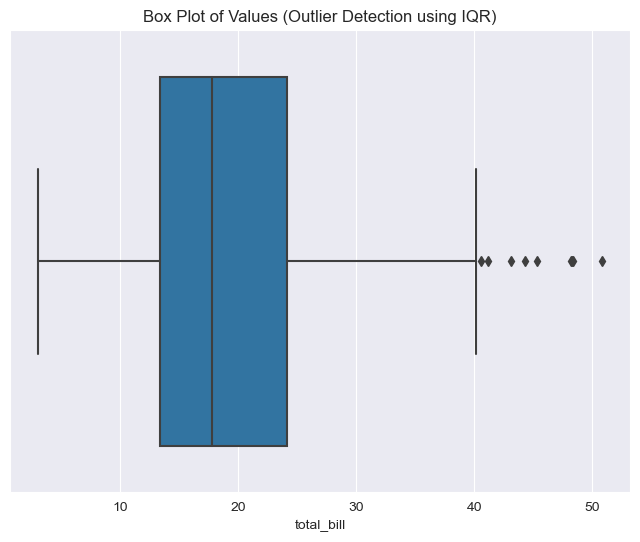

Outliers:


,total_bill,tip,sex,smoker,day,time,size,Is_Outlier
59,48.27,6.73,Male,No,Sat,Dinner,4,True
102,44.30,2.50,Female,Yes,Sat,Dinner,3,True
142,41.19,5.00,Male,No,Thur,Lunch,5,True
156,48.17,5.00,Male,No,Sun,Dinner,6,True
170,50.81,10.00,Male,Yes,Sat,Dinner,3,True
182,45.35,3.50,Male,Yes,Sun,Dinner,3,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
197,43.11,5.00,Female,Yes,Thur,Lunch,4,True
212,48.33,9.00,Male,No,Sat,Dinner,4,True


In [209]:
threshold = 1.5 * IQR              # Define a threshold for outliers (e.g., 1.5 times the IQR)

df['Is_Outlier'] = (df['total_bill'] < (Q1 - threshold)) | (df['total_bill'] > (Q3 + threshold))

plt.figure(figsize=(8, 6))
sns.boxplot(df, x='total_bill')
plt.title('Box Plot of Values (Outlier Detection using IQR)')
plt.show()

outliers = df[df['Is_Outlier']]
print("Outliers:")
outliers

## Problem - 2

### You are given two datasets:

- **employees.csv** - This dataset contains information about employees in a company. The columns are:
    - EmployeeID
    - Name
    - Department
    - Salary
<br>
- **sales.csv** - This dataset contains information about sales transactions. The columns are:
    - TransactionID
    - EmployeeID
    - ProductID
    - Quantity
    - TransactionDate<br>

#### 1. Import the datasets employees.csv and sales.csv into Pandas DataFrames.

In [210]:
employees_file = "employees.csv"
sales_file = "sales.csv"

employees_df = pd.read_csv(employees_file)
sales_df = pd.read_csv(sales_file)

employees_df

,EmployeeID,Name,Department,Salary
0,1,Alice,Engineering,60000
1,2,Bob,Sales,50000
2,3,Charlie,Marketing,55000
3,4,Dave,Engineering,62000
4,5,Eve,Human Resources,48000
5,6,Frank,Engineering,63000
6,7,Grace,Sales,49000
7,8,Hank,Marketing,52000
8,9,Ivy,Human Resources,47000
9,10,Jack,Sales,53000


In [211]:
sales_df

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate
0,1,2.0,1,5,2023-01-10
1,1,2.0,1,5,2023-01-10
2,2,2.0,3,2,2023-01-12
3,3,4.0,2,3,2023-01-15
4,4,7.0,1,4,2023-01-20
5,5,3.0,2,1,2023-01-25
6,6,10.0,1,6,2023-02-01
7,7,1.0,3,5,2023-02-05
8,8,6.0,1,2,2023-02-10
9,9,8.0,2,3,2023-02-12


#### 2. Merge the two DataFrames using an appropriate type of join to include all sales transactions and their corresponding employee information.

In [212]:
emp_sales_df = pd.merge(sales_df, employees_df, on="EmployeeID", how="outer")

emp_sales_df

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary
0,1.0,2.0,1.0,5.0,2023-01-10,Bob,Sales,50000.0
1,1.0,2.0,1.0,5.0,2023-01-10,Bob,Sales,50000.0
2,2.0,2.0,3.0,2.0,2023-01-12,Bob,Sales,50000.0
3,3.0,4.0,2.0,3.0,2023-01-15,Dave,Engineering,62000.0
4,4.0,7.0,1.0,4.0,2023-01-20,Grace,Sales,49000.0
5,5.0,3.0,2.0,1.0,2023-01-25,Charlie,Marketing,55000.0
6,6.0,10.0,1.0,6.0,2023-02-01,Jack,Sales,53000.0
7,6.0,10.0,1.0,6.0,2023-02-01,Jack,Sales,53000.0
8,7.0,1.0,3.0,5.0,2023-02-05,Alice,Engineering,60000.0
9,8.0,6.0,1.0,2.0,2023-02-10,Frank,Engineering,63000.0


#### 3. Clean the merged dataset by:

  - Removing duplicates
  - Filling or dropping any missing values

In [213]:
emp_sales_df = emp_sales_df.drop_duplicates()

emp_sales_df

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary
0,1.0,2.0,1.0,5.0,2023-01-10,Bob,Sales,50000.0
2,2.0,2.0,3.0,2.0,2023-01-12,Bob,Sales,50000.0
3,3.0,4.0,2.0,3.0,2023-01-15,Dave,Engineering,62000.0
4,4.0,7.0,1.0,4.0,2023-01-20,Grace,Sales,49000.0
5,5.0,3.0,2.0,1.0,2023-01-25,Charlie,Marketing,55000.0
6,6.0,10.0,1.0,6.0,2023-02-01,Jack,Sales,53000.0
8,7.0,1.0,3.0,5.0,2023-02-05,Alice,Engineering,60000.0
9,8.0,6.0,1.0,2.0,2023-02-10,Frank,Engineering,63000.0
10,9.0,8.0,2.0,3.0,2023-02-12,Hank,Marketing,52000.0
11,10.0,5.0,3.0,1.0,2023-02-20,Eve,Human Resources,48000.0


In [214]:
emp_sales_df = emp_sales_df.dropna()

emp_sales_df

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary
0,1.0,2.0,1.0,5.0,2023-01-10,Bob,Sales,50000.0
2,2.0,2.0,3.0,2.0,2023-01-12,Bob,Sales,50000.0
3,3.0,4.0,2.0,3.0,2023-01-15,Dave,Engineering,62000.0
4,4.0,7.0,1.0,4.0,2023-01-20,Grace,Sales,49000.0
5,5.0,3.0,2.0,1.0,2023-01-25,Charlie,Marketing,55000.0
6,6.0,10.0,1.0,6.0,2023-02-01,Jack,Sales,53000.0
8,7.0,1.0,3.0,5.0,2023-02-05,Alice,Engineering,60000.0
9,8.0,6.0,1.0,2.0,2023-02-10,Frank,Engineering,63000.0
10,9.0,8.0,2.0,3.0,2023-02-12,Hank,Marketing,52000.0
11,10.0,5.0,3.0,1.0,2023-02-20,Eve,Human Resources,48000.0


#### 4. Create a new column called `RevenueGenerated` which is a product of a hypothetical `ProductPrice` column and the `Quantity` column. Assume that the ProductPrice for ProductID 1 is `$20`, for ProductID 2 is `$15`, and for ProductID 3 is `$30`.

In [215]:
product_price_mapping = {1: 20, 2: 15, 3: 30}

def calculate_revenue(row):
    product_id = row['ProductID']
    quantity = row['Quantity']
    
    product_price = product_price_mapping.get(product_id, 0)
    
    revenue = product_price * quantity
    return revenue

emp_sales_df['RevenueGenerated'] = emp_sales_df.apply(calculate_revenue, axis=1)

emp_sales_df

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary,RevenueGenerated
0,1.0,2.0,1.0,5.0,2023-01-10,Bob,Sales,50000.0,100.0
2,2.0,2.0,3.0,2.0,2023-01-12,Bob,Sales,50000.0,60.0
3,3.0,4.0,2.0,3.0,2023-01-15,Dave,Engineering,62000.0,45.0
4,4.0,7.0,1.0,4.0,2023-01-20,Grace,Sales,49000.0,80.0
5,5.0,3.0,2.0,1.0,2023-01-25,Charlie,Marketing,55000.0,15.0
6,6.0,10.0,1.0,6.0,2023-02-01,Jack,Sales,53000.0,120.0
8,7.0,1.0,3.0,5.0,2023-02-05,Alice,Engineering,60000.0,150.0
9,8.0,6.0,1.0,2.0,2023-02-10,Frank,Engineering,63000.0,40.0
10,9.0,8.0,2.0,3.0,2023-02-12,Hank,Marketing,52000.0,45.0
11,10.0,5.0,3.0,1.0,2023-02-20,Eve,Human Resources,48000.0,30.0


#### 5. Group the data to answer the following questions:

  - What is the total revenue generated by each department?
  - Who are the top 5 employees in terms of revenue generated?
  - What is the monthly revenue trend in the company?

In [216]:
department_revenue = emp_sales_df.groupby("Department")["RevenueGenerated"].sum().reset_index()

department_revenue

,Department,RevenueGenerated
0,Engineering,235.0
1,Human Resources,30.0
2,Marketing,60.0
3,Sales,360.0


In [217]:
employee_revenue = emp_sales_df.groupby("EmployeeID")["RevenueGenerated"].sum().reset_index()

sorted_employee_revenue = employee_revenue.sort_values(by="RevenueGenerated", ascending=False)
top_5_employees = sorted_employee_revenue.head(5)

top_5_employees

,EmployeeID,RevenueGenerated
1,2.0,160.0
0,1.0,150.0
8,10.0,120.0
6,7.0,80.0
3,4.0,45.0


In [218]:
emp_sales_df["TransactionDate"] = pd.to_datetime(emp_sales_df["TransactionDate"])

emp_sales_df["Year"] = emp_sales_df["TransactionDate"].dt.year
emp_sales_df["Month"] = emp_sales_df["TransactionDate"].dt.month

monthly_revenue = emp_sales_df.groupby(["Year", "Month"])["RevenueGenerated"].sum().reset_index()

monthly_revenue = monthly_revenue.sort_values(["Year", "Month"])

monthly_revenue

,Year,Month,RevenueGenerated
0,2023,1,300.0
1,2023,2,385.0


In [219]:
emp_sales_df = emp_sales_df.drop('Year', axis=1)      #Dropping the year column as for all the data the year is same

emp_sales_df

,TransactionID,EmployeeID,ProductID,Quantity,TransactionDate,Name,Department,Salary,RevenueGenerated,Month
0,1.0,2.0,1.0,5.0,2023-01-10,Bob,Sales,50000.0,100.0,1
2,2.0,2.0,3.0,2.0,2023-01-12,Bob,Sales,50000.0,60.0,1
3,3.0,4.0,2.0,3.0,2023-01-15,Dave,Engineering,62000.0,45.0,1
4,4.0,7.0,1.0,4.0,2023-01-20,Grace,Sales,49000.0,80.0,1
5,5.0,3.0,2.0,1.0,2023-01-25,Charlie,Marketing,55000.0,15.0,1
6,6.0,10.0,1.0,6.0,2023-02-01,Jack,Sales,53000.0,120.0,2
8,7.0,1.0,3.0,5.0,2023-02-05,Alice,Engineering,60000.0,150.0,2
9,8.0,6.0,1.0,2.0,2023-02-10,Frank,Engineering,63000.0,40.0,2
10,9.0,8.0,2.0,3.0,2023-02-12,Hank,Marketing,52000.0,45.0,2
11,10.0,5.0,3.0,1.0,2023-02-20,Eve,Human Resources,48000.0,30.0,2


#### 6. Export the cleaned and transformed dataset to a new CSV file called employee_sales_summary.csv.

In [189]:
emp_sales_df.to_csv("employee_sales_summary.csv", index=False)